# Analysis of training data

### Imports

In [1]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

## Load Data Files

In [2]:
def load_files(out_dir, tier):
    questions = pd.read_csv(os.path.join(out_dir, tier + '.question'), delimiter="\n", header=None, names=["data"])
    contexts = pd.read_csv(os.path.join(out_dir, tier + '.context'), delimiter="\n", header=None, names=["data"])
    answers = pd.read_csv(os.path.join(out_dir, tier + '.answer'), delimiter="\n", header=None, names=["data"])
    spans = pd.read_csv(os.path.join(out_dir, tier + '.span'), delimiter=" ", header=None, names=["start", "end"])
    return questions, contexts, answers, spans

In [3]:
train_questions, train_contexts, train_answers, train_spans = load_files("data", "train")

In [4]:
dev_questions, dev_contexts, dev_answers, dev_spans = load_files("data", "dev") 

## Analyze Data Utils

In [228]:
def plot_data_counts(data, title, num_bins=20, q=99):   
    top_n = data.value_counts().nlargest(15).to_frame()
    occurances = np.array(top_n.values)[:, 0]
    percentages = np.round(occurances / np.sum(occurances), 3)
    table = np.stack((np.array(top_n.index), occurances, percentages), axis =1)
    percentile = np.percentile(data, q)
    
    fig = plt.figure(figsize=(18,5))

    ax1 = fig.add_subplot(121)
    ax1.hist(data, num_bins, normed=1, facecolor='blue', alpha=0.5)
    ax1.axvline(percentile, color='b', linestyle='dashed', linewidth=2, label=str(q) + " Percentile is " + str(percentile))
    ax1.legend()
    ax1.set_xlabel('Count')
    ax1.set_ylabel('Occurrence Percentage')
    ax1.set_title(title.title())
    
    ax2 = fig.add_subplot(122)
    font_size=14
    bbox=[0, 0, 1, 1]
    ax2.axis('off')
    mpl_table = ax2.table(cellText=table, bbox=bbox, colLabels=["Count", "Occurances", "Rate"])
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)
    ax2.set_title(title.title())
    plt.show()
    

## Analyze Word Counts

In [250]:
def analyze_word_count(dataset, title, num_bins=50):   
    dataset["word_count"] = dataset["data"].apply(lambda x: len(str(x).split(" ")))
    plot_data_counts(dataset["word_count"], title.title() + " Word Counts", num_bins=num_bins)

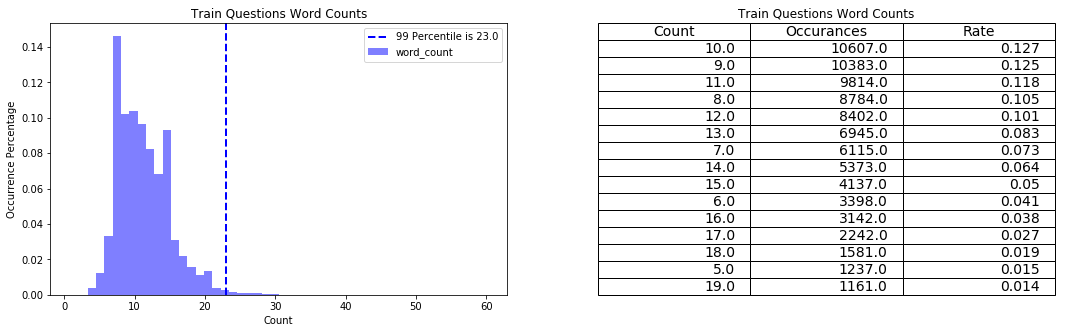

In [ ]:
analyze_word_count(train_questions, "train questions")

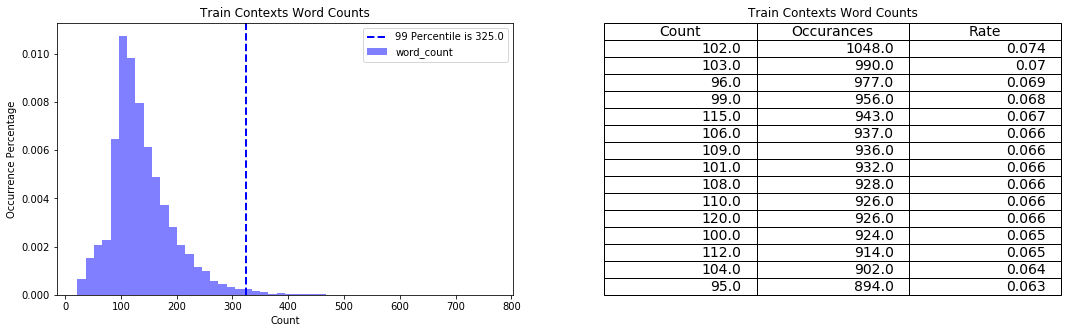

In [252]:
analyze_word_count(train_contexts, "train contexts")

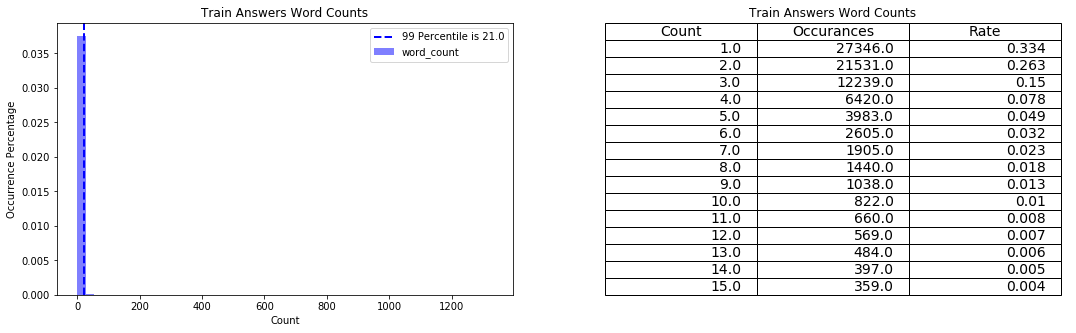

In [253]:
analyze_word_count(train_answers, "train answers")

## Analyze Head Words

In [197]:
def analyze_start_word(dataset, title, start=0, end=1):   
    heads = dataset["data"].apply(lambda x: " ".join(str(x).split(" ")[start: end]))
    top_n = heads.value_counts().nlargest(15).to_frame()
    occurances = np.array(top_n.values)[:, 0]
    percentages = np.round(occurances / np.sum(occurances), 3)
    table = np.stack((np.array(top_n.index), occurances, percentages), axis =1)

    
    fig = plt.figure(figsize=(18,5))
    ax1 = fig.add_subplot(121)
    pd.value_counts(heads).nlargest(20).plot.bar(ax=ax1)
    ax1.set_xlabel('Word Count')
    ax1.set_ylabel('Occurrences')
    ax1.set_title(title.title() + " Head")
    
    ax2 = fig.add_subplot(122)
    font_size=14
    bbox=[0, 0, 1, 1]
    ax2.axis('off')
    mpl_table = ax2.table(cellText=table, bbox=bbox, colLabels=["Head", "Occurances", "Rate"])
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)
    ax2.set_title(title.title() + " Top Head Words")
    plt.show()

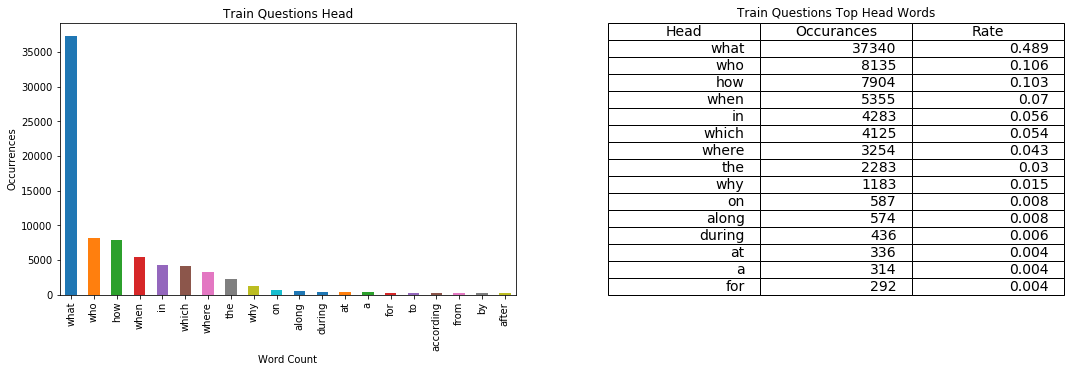

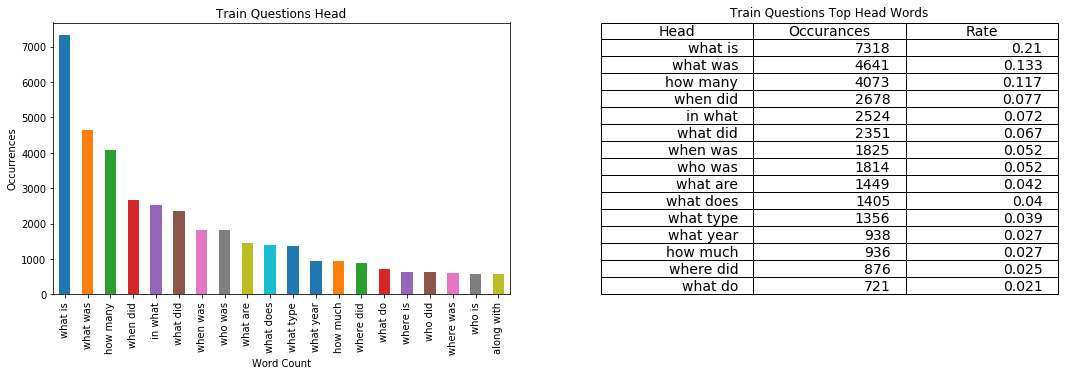

In [198]:
analyze_start_word(train_questions, "train questions", start=0, end=1)
analyze_start_word(train_questions, "train questions", start=0, end=2)

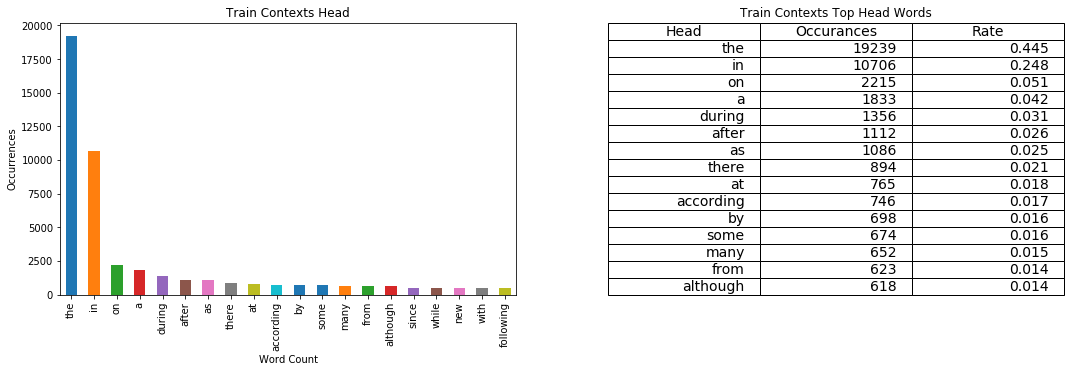

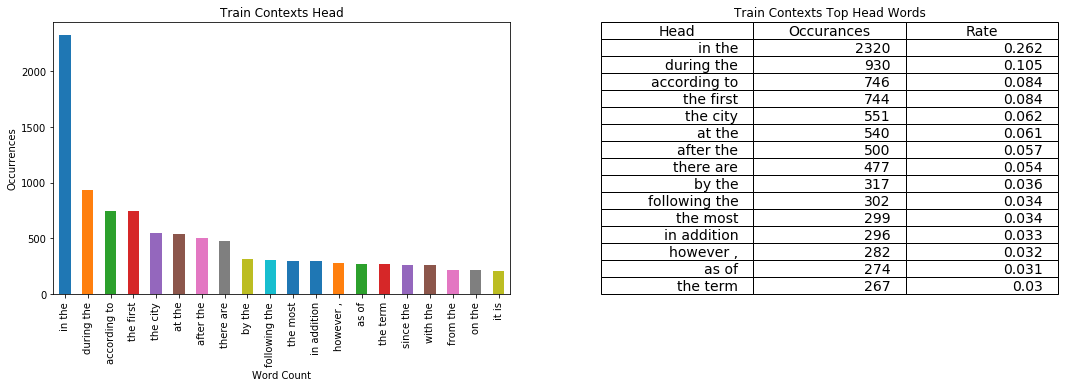

In [199]:
analyze_start_word(train_contexts, "train contexts", start=0, end=1)
analyze_start_word(train_contexts, "train contexts", start=0, end=2)

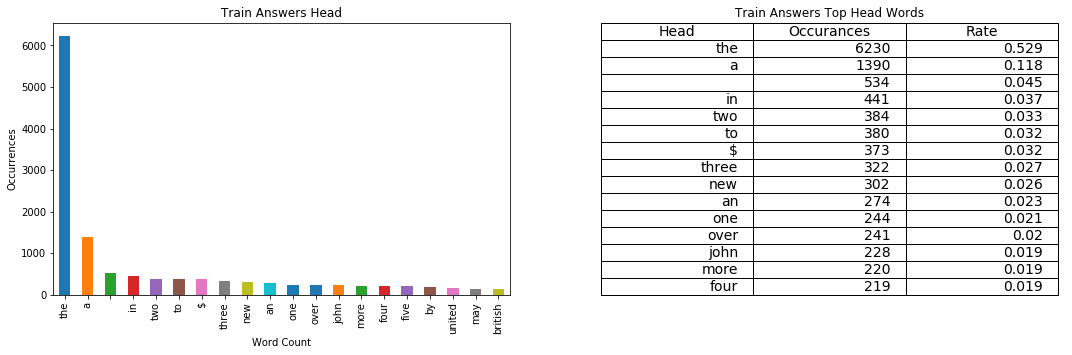

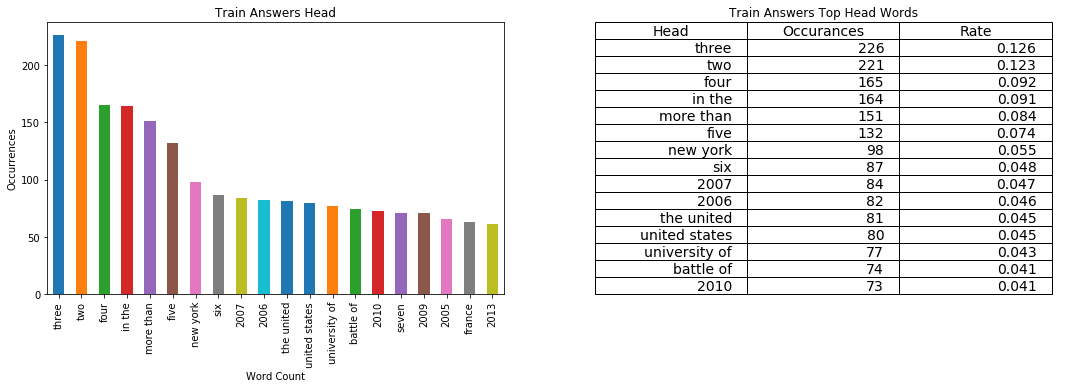

In [200]:
analyze_start_word(train_answers, "train answers", start=0, end=1)
analyze_start_word(train_answers, "train answers", start=0, end=2)

## Analyze Answer Position

In [264]:
def analyze_answer_pos(context, span, title, num_bins=100, percentile=99):   
    plot_data_counts(span["start"], title + " Start Position", num_bins=num_bins, q=percentile)
    plot_data_counts(span["end"], title + " End Position", num_bins=num_bins, q=percentile)   
    plot_data_counts(span["end"]-span["start"] + 1, title + " Length", num_bins=num_bins, q=percentile)   

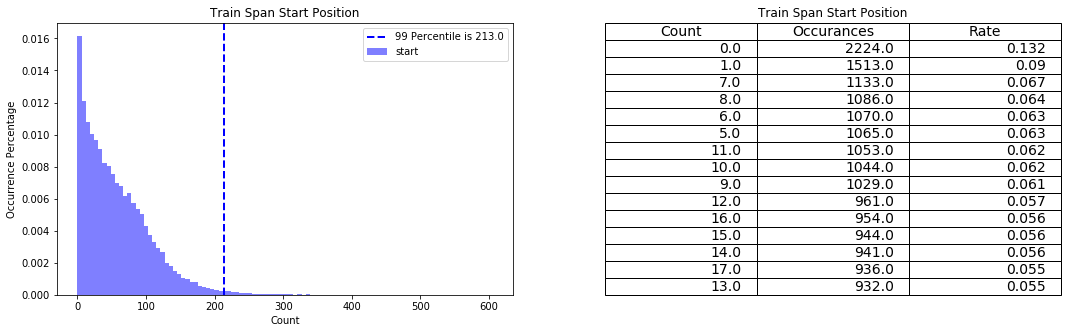

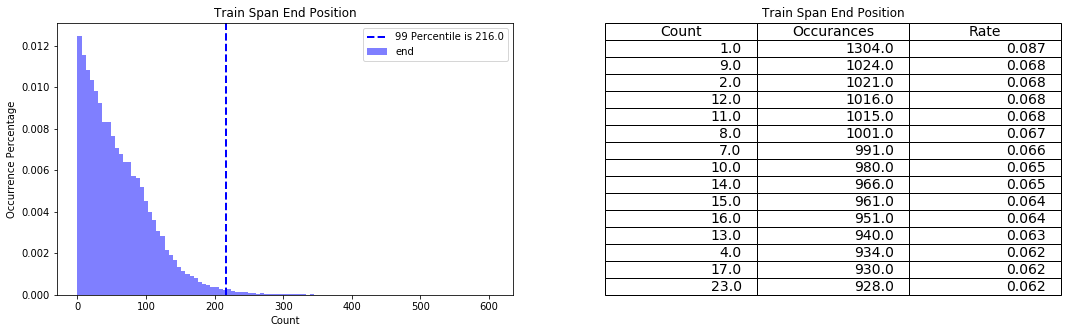

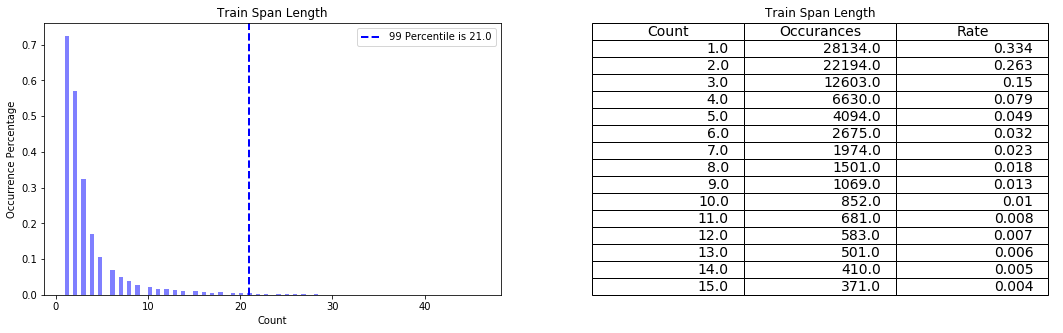

In [265]:
analyze_answer_pos(train_contexts, train_spans, "Train Span")